In [7]:
import keras
import numpy as np
import pandas as pd
from sklearn import datasets
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

# 1. create the model

In [8]:
model  = Sequential() #顺序模型

#输入曾
model.add(Dense(784, input_shape=(784,))) # Dense 就是常用的全链接层次,里面有几个神经元
model.add(Activation("relu")) # 激活函数

#隐层 1 
model.add(Dense(160)) # Dense就是常用的全链接层
model.add(Activation("relu")) #激活函数

#隐层 2 
model.add(Dense(160)) # Dense就是常用的全链接层
model.add(Activation("relu")) #激活函数

#隐层 3
model.add(Dense(160)) # Dense就是常用的全链接层
model.add(Activation("relu")) #激活函数

#隐层 4
model.add(Dense(160)) # Dense就是常用的全链接层
model.add(Activation("relu")) #激活函数

#输出层
model.add(Dense(10)) # Dense就是常用的全链接层
model.add(Activation("softmax")) # 只能输出0 和 1

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])  

# 2. Read the data

In [10]:
from keras.utils import np_utils

dataset = pd.read_csv("train.csv")
target = dataset.iloc[:,0].values.ravel()
train = dataset.iloc[:,1:].values
test = pd.read_csv("test.csv").values

train_x = train
train_y = np_utils.to_categorical(target, 10) # cnvert into one-hot-encoder

# "verbose" is to print the result,  "epoch" is training frequency
history = model.fit(train_x, train_y, epochs=500,  verbose=1, validation_split= 0.2) 


print (history.history['acc'])
print (history.history['loss'])

Train on 33600 samples, validate on 8400 samples
Epoch 1/500
33600/33600 [==============================] - 58s - loss: 14.5213 - acc: 0.0988 - val_loss: 14.4833 - val_acc: 0.1014
Epoch 2/500
33600/33600 [==============================] - 59s - loss: 14.5447 - acc: 0.0976 - val_loss: 14.4833 - val_acc: 0.1014
Epoch 3/500
33600/33600 [==============================] - 58s - loss: 14.5447 - acc: 0.0976 - val_loss: 14.4833 - val_acc: 0.1014
Epoch 4/500
33600/33600 [==============================] - 60s - loss: 14.5447 - acc: 0.0976 - val_loss: 14.4833 - val_acc: 0.1014
Epoch 5/500
33600/33600 [==============================] - 62s - loss: 14.5447 - acc: 0.0976 - val_loss: 14.4833 - val_acc: 0.1014
Epoch 6/500
33600/33600 [==============================] - 62s - loss: 14.5447 - acc: 0.0976 - val_loss: 14.4833 - val_acc: 0.1014
Epoch 7/500
33600/33600 [==============================] - 61s - loss: 14.5447 - acc: 0.0976 - val_loss: 14.4833 - val_acc: 0.1014
Epoch 8/500
33600/33600 [=========

KeyboardInterrupt: 

# 3. Draw a graph

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt


plt.xlabel('x')
plt.ylabel('y')
plt.title('acc graph')

plt.plot(range(len(history.history['val_acc'])), history.history['val_acc'])

plt.show()

# 4. Persist the model

In [8]:
import h5py
from keras.models import load_model

model.save('model.h5') # 模型持久化

model2 = load_model('model.h5') # load the model

# 5. Validate

In [9]:
y_pred2 = model2.predict(train_x)

y_pred1 = model.predict(train_x)

#y_pred1 == y_pred2 # compare the difference, no different

for index, item in enumerate(y_pred2):
    for i, it in enumerate(item):
        if (item[i] != y_pred1[index][i]):
            print (False)


print ("Finished, all matched")

Finished, all matched


In [10]:
import numpy as np

# restore one-hot to the original format
np.argmax(y_pred1[1500], axis=0)  # revert one-hot back to normal digit

1

In [6]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

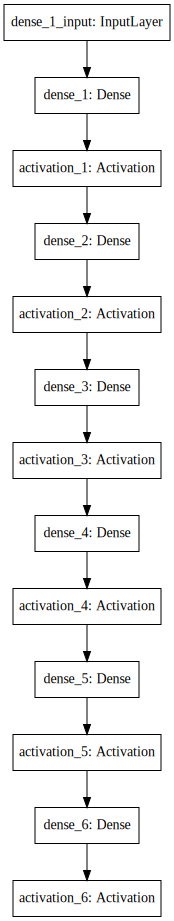

In [11]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [6]:
y_pred = model.predict_classes(test) ## predict, = predict

np.savetxt('neural_5.csv', np.c_[range(1,len(test)+1),y_pred], delimiter=',', 
           header = 'ImageId,Label', comments = '', fmt='%d')

27584/28000 [============================>.] - ETA: 0s